In [21]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from acalib import *
from acalib.cupid import clumpfind

## Loading Data

In [22]:
binpath = '../../bindata/fits/cubes/'

# Data from ALMA science verification 
orion_path = binpath + 'Orion.methanol.cbc.contsub.image.fits'
container = load_fits(orion_path)
orion     = container.primary


data3D = orion.data.astype(np.float64)
rms3D = np.sqrt((data3D*data3D).sum()/data3D.size)

data2D = data3D.sum(axis=0)
rms2D = np.sqrt((data2D*data2D).sum()/data2D.size)

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


## Applying pycupid's clumpfind

In [23]:
res2D = clumpfind(data2D, dict(), rms2D)
print res2D.min()
print res2D.max()
print res2D.size

-1
2
10000


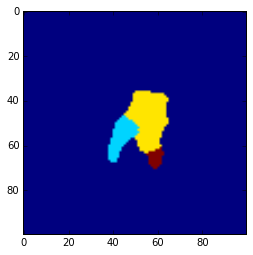

In [24]:
plt.imshow(res2D)
plt.show()

In [25]:
res3D = clumpfind(data3D, dict(), rms3D)
print res3D.min()
print res3D.max()
print res3D.size

-1
24
410000
